# Case Study - Wine Quality Prediction#
***

## Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

## Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

## Problem Statement:
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository. The wine dataset is a classic and very easy multi-class classification dataset.

## Attribute Information
    - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
    - Output variable (based on sensory data): 
    - quality (score between 0 and 10)

## Missing attribute Values: None

## Description of attributes
1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 12 - quality (score between 0 and 10)

## Import all necessary modules and load the data

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.feature_extraction.text import CountVectorizer # DT does not take strings as input for the model fit step
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
wine_df = pd.read_csv('winequality-red.csv',sep = ';') # data in the seperate by ',' form

## <span style = 'color:Blue'> General views of Dataset wine.</span>

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.describe().transpose()  #for analysing distribution of various attribute

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Checking Null Values

In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Number of unique value in each variables

In [7]:
for column in wine_df:
    print(column,wine_df[column].nunique())

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


## Checking dependent variable either data are balanced or imbalanced

In [8]:
wine_df['quality'].value_counts(normalize = True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [9]:
print('the shape of wine data is:',wine_df.shape)

the shape of wine data is: (1599, 12)


## Data visualization to interpret how it distributed

fixed acidity


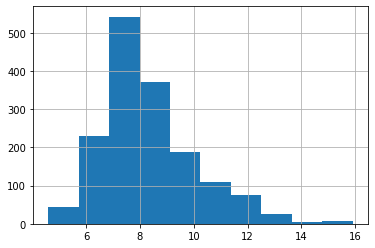

volatile acidity


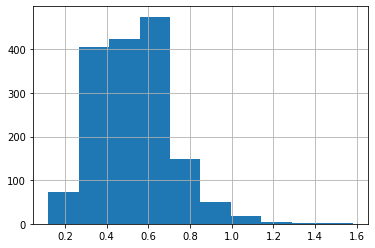

citric acid


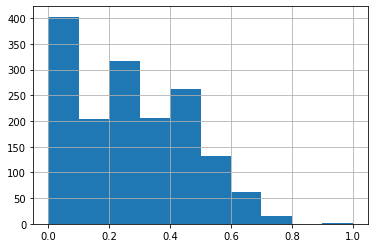

residual sugar


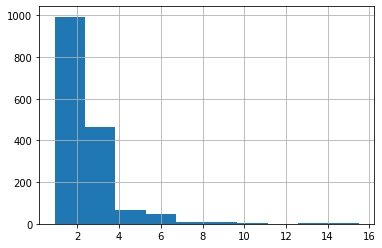

chlorides


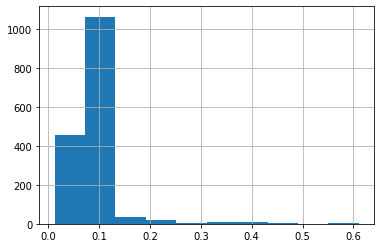

free sulfur dioxide


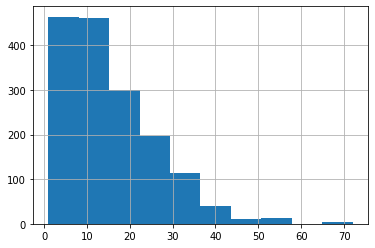

total sulfur dioxide


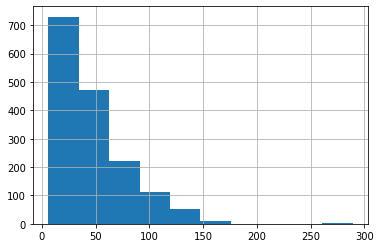

density


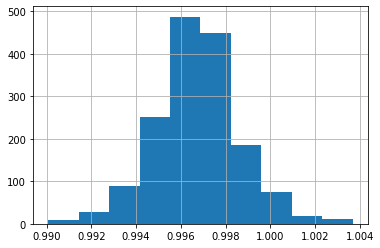

pH


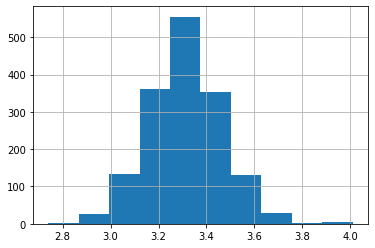

sulphates


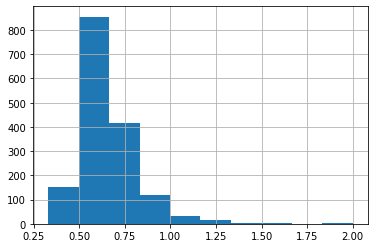

alcohol


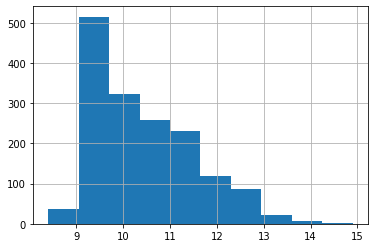

quality


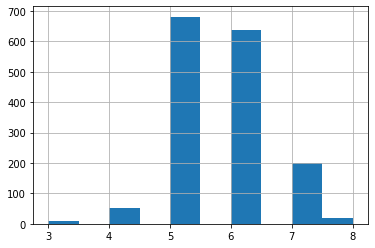

In [10]:
for variable in wine_df:
    print(variable)
    wine_df[variable].hist()
    plt.show()
    

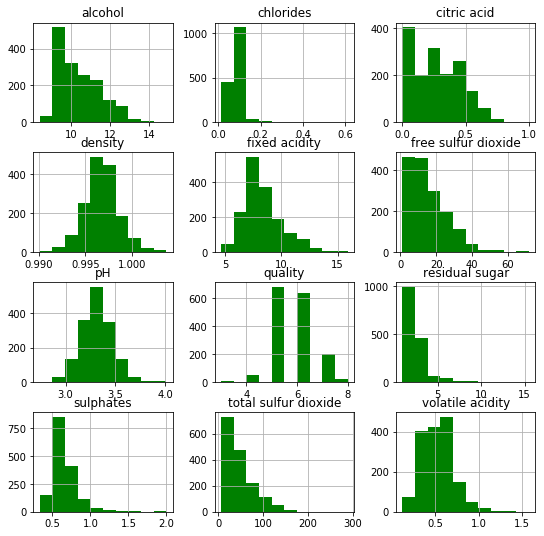

In [11]:
wine_df.hist(color = 'green',figsize=(9,9))
plt.show()


#### Above daigram has shows some skweed variables and less skweed are better choice for us to predict better model so we worked on chlorides, free sulfer ioxide,total sulfurdioxide,,sulphates and volatile acidity
about skwed :skewed is common.Its often desirable to transfermed skewed data convert it into values between 0 and 1.
standard use for such conversions are :Normalization,sigmoid function,log,cube root  and hyperbolic tangent.

### Normalization the skewed data

In [12]:
wine_df['total sulfur dioxide'].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [13]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column-lower)/(upper-lower)
    return y
sulfur_dioxide_normalize = normalize(wine_df['total sulfur dioxide'])
sulfur_dioxide_normalize.describe()
### similar think can we do by using sigmoid

count    1599.000000
mean        0.142996
std         0.116238
min         0.000000
25%         0.056537
50%         0.113074
75%         0.197880
max         1.000000
Name: total sulfur dioxide, dtype: float64

In [14]:
wine_df[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


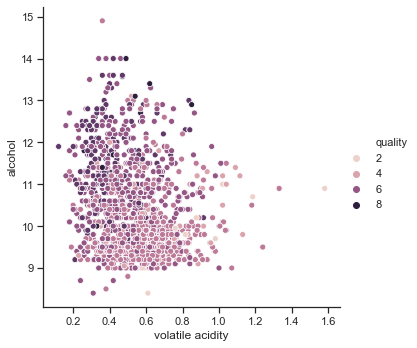

In [15]:
sns.set(style='ticks',palette = 'muted')

sns.relplot(y = 'alcohol',x = 'volatile acidity',data=wine_df,hue = 'quality' )

Above diagram shows that quality is increase when alochol ratio is increase where as valatile acidity should be lower is better quality of wine.

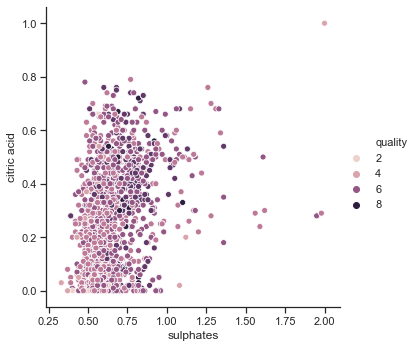

In [16]:
sns.relplot(x='sulphates',y= 'citric acid',data=wine_df,hue = 'quality')

Insights in a diagram is between 0.3 to 0.6 of citric acid is better quality where as between 0.7 to 0.9 have good quality of wine. 

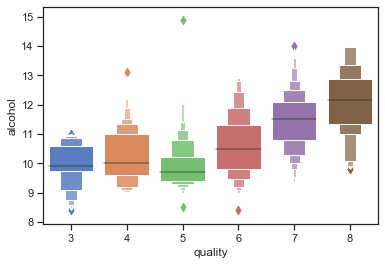

In [17]:
## Using box plot
sns.boxenplot(y='alcohol',x='quality',data=wine_df)

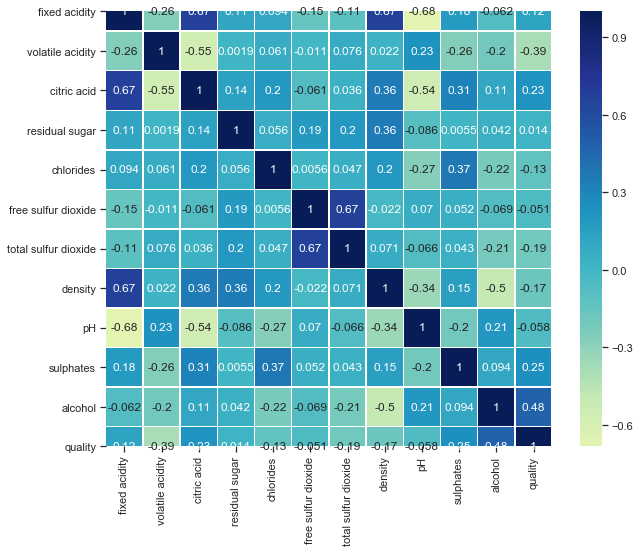

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
           annot=True,
           linewidths=0.5,
           center=0,
           cbar=True,
           cmap='YlGnBu')
plt.show()

Above diagram quality is highly correlated with alcohol,sulphates and highly negative
correlated with volatile acidity.


## Now managing labels of dependent varaibles

In [19]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
wine_df['quality']=wine_df['quality'].replace(8,7)
wine_df['quality']=wine_df['quality'].replace(3,5)
wine_df['quality']=wine_df['quality'].replace(4,6)

In [21]:
wine_df['quality'].value_counts()

6    691
5    691
7    217
Name: quality, dtype: int64

## Spliting Wine Dataset

In [22]:
x = wine_df.drop('quality',axis=1)
y = wine_df['quality']

In [23]:
#for spliting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)
x_train.shape,x_test.shape

((1199, 11), (400, 11))

## Using Machine Learning Deision Tree 

In [24]:
# using base model without tuning hyper parameters 
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [25]:
#accuracy of the base model
print(decision_tree.score(x_train,y_train))
print(decision_tree.score(x_test,y_test))

1.0
0.61


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting

## Tuning Hyper-Parameters

In [26]:
import time

In [27]:
fit_decision = DecisionTreeClassifier(random_state=42)

## Using GridSearchCV

In [28]:
#tuning Hyperparameters using GridSearchcv
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6,7,8],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
             'min_samples_leaf':[2,3,4]}

cv_rf = GridSearchCV(fit_decision, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2}
Time taken in grid search:  16.84


In [29]:
##Aplying model after finding best parameters
decision_tree = DecisionTreeClassifier(random_state=100,criterion='gini',max_depth=5,min_samples_leaf=4,min_samples_split=10)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [30]:
print('training accuracy score: ',decision_tree.score(x_train,y_train))
print('testing accuracy score: ',decision_tree.score(x_test,y_test))

training accuracy score:  0.7030859049207673
testing accuracy score:  0.6275


In [32]:
y_pred = decision_tree.predict(x_test)
y_pred_train = decision_tree.predict(x_train)
ass_DT = accuracy_score(y_test,y_pred)

## Deciosion Tree diagram using graphviz

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


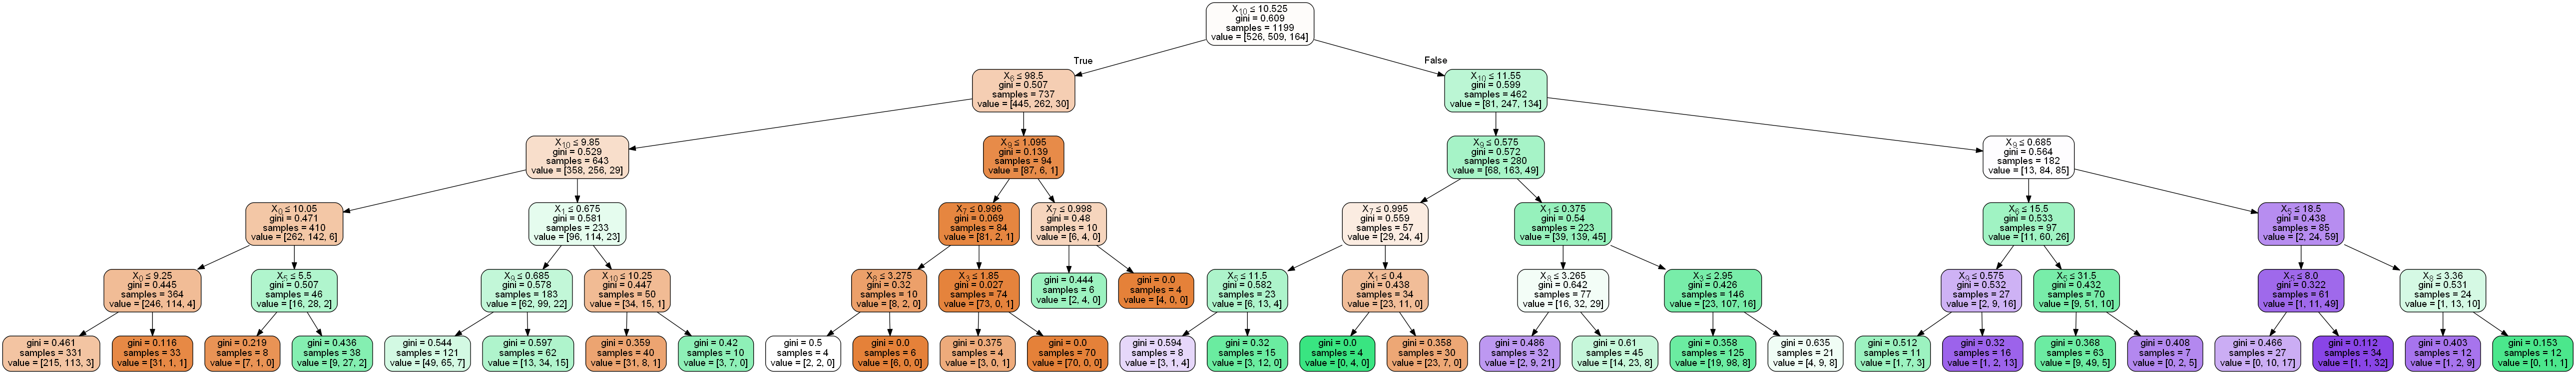

In [33]:
##for dicision tree diagrmam
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Applying Oversampling Decison tree 

In [34]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

Using TensorFlow backend.


In [35]:
ros  = RandomOverSampler(random_state=22)
x_over,y_over = ros.fit_resample(x,y)
x_traino,x_testo,y_traino,y_testo = train_test_split(x_over,y_over,random_state=42,test_size = 0.30,)
Decision_tree_over  = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=8,min_samples_leaf=5)
Decision_tree_over.fit(x_traino,y_traino)
print('training accuracy :',Decision_tree_over.score(x_traino,y_traino))
print('testing accuracy :',Decision_tree_over.score(x_testo,y_testo))

training accuracy : 0.8070296347346657
testing accuracy : 0.6752411575562701


In [38]:
y_pred_over = Decision_tree_over.predict(x_testo)
y_pred_train_over = Decision_tree_over.predict(x_traino)
ass_DT_over = accuracy_score(y_testo,y_pred_over)

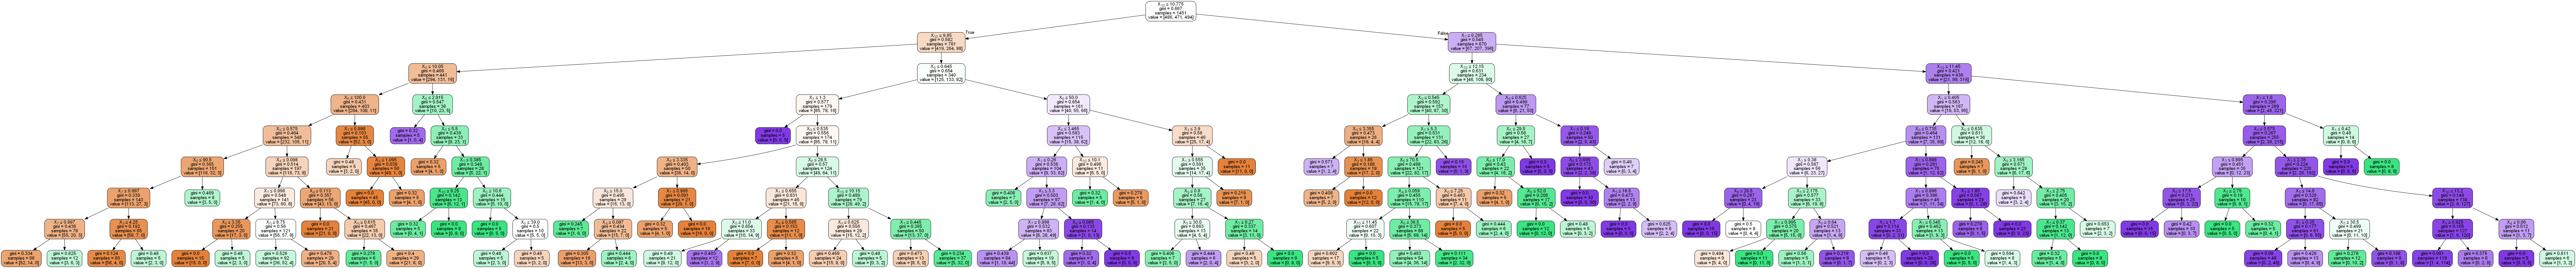

In [36]:
dot_data = StringIO()
export_graphviz(Decision_tree_over,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### stil facing overfiting after using regularised,oversampling and non oversampling  but there is not geettting better accuracy now using feature extraction.

In [39]:
xvar = wine_df.drop('quality',axis = 1)
features_cols = xvar.columns

In [40]:
## calculating Feature Importance
feature_importance = decision_tree.tree_.compute_feature_importances(normalize=False)
feature_imp_dict = dict(zip(features_cols,decision_tree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feature_imp_dict,orient = 'index')
feat_imp.sort_values(by = 0,ascending = False)

,0
alcohol,0.441962
sulphates,0.123730
total sulfur dioxide,0.111632
free sulfur dioxide,0.085652
volatile acidity,0.082097
pH,0.055734
fixed acidity,0.054648
density,0.025937
residual sugar,0.018609
citric acid,0.000000


In [41]:
## calculating Feature Importance
feature_importance = Decision_tree_over.tree_.compute_feature_importances(normalize=False)
feature_imp_dict = dict(zip(features_cols,Decision_tree_over.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feature_imp_dict,orient = 'index')
feat_imp.sort_values(by = 0,ascending = False)

,0
alcohol,0.361854
sulphates,0.120356
citric acid,0.080068
total sulfur dioxide,0.076668
density,0.073823
volatile acidity,0.065424
residual sugar,0.062512
free sulfur dioxide,0.052274
pH,0.044290
fixed acidity,0.035590


#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [44]:
#Store the accuracy results for each model in a dataframe for a final comparision
resultsDf = pd.DataFrame({'Method':['decision_tree','Decision_tree_over'],'accuracy':[ass_DT,ass_DT_over]})
resultsDf = resultsDf[['Method','accuracy']]
resultsDf

,Method,accuracy
0,decision_tree,0.627500
1,Decision_tree_over,0.675241


### Not a satisfactory result but fine average.

In [45]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
